In [1]:
from numpy import *
import cmath
from random import randrange
import pandas as pd
import time
from IPython.display import clear_output
import scipy
import matplotlib.pyplot as plt

In [2]:
one = array([[int(0) + 0j], [int(1) + 0j]])
zero = array([[int(1) + 0j], [int(0) + 0j]])
plus = (1/sqrt(2))*(zero + one)
minus = (1/sqrt(2))*(zero - one)

In [3]:
def norm(state):
    prod = scipy.sqrt(transpose(state.conjugate()).dot(state))
    return(asscalar(prod))

In [4]:
def fidelityp(guess, right):
    mult = (transpose(guess.conjugate())).dot(right)*(transpose(right.conjugate())).dot(guess)
    #print(mult)
    root = asscalar((mult))
    return(abs(root))

In [5]:
H = (1/sqrt(2))*array([[1,1],[1, -1]])
I = array([[1 , 0], [0, 1]])
T = array([[1, 0], [0, exp((1j*pi)/4)]])
S = array([[1, 0], [0, 1j]])

In [6]:
X = array([[0 , 1], [1,0]])
X1 = kron(kron(X, I),I)
X2 = kron(kron(I,X),I)
X3 = kron(kron(I,I),X)

Y = array([[0 , -1j], [1j,0]])
Y1 = kron(kron(Y, I),I)
Y2 = kron(kron(I,Y),I)
Y3 = kron(kron(I,I),Y)

Z = array([[1 , 0], [0,-1]])
Z1 = kron(kron(Z, I),I)
Z2 = kron(kron(I,Z),I)
Z3 = kron(kron(I,I),Z)

In [7]:
zerop = zero*transpose(zero)
onep = one*transpose(one)


In [8]:
CNOT13 = kron(kron(zerop,I),I) + kron(kron(onep,I),X)
CNOT31 = kron(kron(I,I),zerop) + kron(kron(X,I),onep)
CNOT21 = kron(kron(I,zerop),I) + kron(kron(X,onep),I)
CNOT23 = kron(kron(I,zerop),I) + kron(kron(I,onep),X)
CNOT32 = kron(kron(I,I),zerop) + kron(kron(I,X),onep)
CNOT12 = kron(kron(zerop,I),I) + kron(kron(onep,X),I)
H1 = kron(kron(H, I), I)
H2 = kron(kron(I, H), I)
H3 = kron(kron(I, I), H)
T1 = kron(kron(T, I), I)
T2 = kron(kron(I, T), I)
T3 = kron(kron(I, I), T)
S1 = kron(kron(S, I), I)
S2 = kron(kron(I, S), I)
S3 = kron(kron(I, I), S)
I3 = kron(kron(I,I),I)


In [9]:
glist = [I3, CNOT12, CNOT21, CNOT13, CNOT31, CNOT23, CNOT32, H1, H2, H3, T1, T2, T3, S1, S2, S3]

In [10]:
zero3 = kron(kron(zero,zero),zero)
zzo = kron(kron(zero,zero),one)
zoz = kron(kron(zero,one),zero)
zoo = kron(kron(zero,one),one)
ozz = kron(kron(one,zero),zero)
ozo = kron(kron(one,zero),one)
ooz = kron(kron(one,one),zero)
one3 = kron(kron(one,one),one)


In [40]:
Q_table = pd.DataFrame()
for m in range(0,len(glist)):
    gate = m
    new = (glist[m].dot(zero3))
    Q = pd.DataFrame({'state' : str(zero3), 'gate':gate, 'new': str(new), 'Q':0, 'fidelity':0}, index=[0])
    Q_table = Q_table.append(Q)
Q_table = Q_table.reset_index(drop=True)

In [41]:
Q_table

,state,gate,new,Q,fidelity
0,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,0
1,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,1,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,0
2,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,2,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,0
3,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,3,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,0
4,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,4,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,0
5,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,5,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,0
6,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,6,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,0,0
7,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,7,[[0.70710678+0.j]\n [0. +0.j]\n [0. ...,0,0
8,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,8,[[0.70710678+0.j]\n [0. +0.j]\n [0.7071...,0,0
9,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [...,9,[[0.70710678+0.j]\n [0.70710678+0.j]\n [0. ...,0,0


In [32]:
alpha = 0.5 #how much we update Q for every new action
gamma = 0.9 #discount factor 

num_iter = 1 #how many agents will come up with their own Q values from scratch
num_repeats = 1000 #How many events one agent will go through to obtain Q values
penalty = 0.1 #How much taken off reward for each step
steps = 10 #How many steps in an event

In [35]:
theta = pi/3
a = cos(theta)
b = sin(theta)
psi = a*zero + b*one
psi1 = kron(kron(psi,zero),zero)
right = H3.dot(H2.dot(H1.dot(CNOT12.dot(CNOT13.dot(psi1)))))
#right = CNOT12.dot(CNOT13.dot(psi1))

In [57]:
right = (CNOT12.dot(CNOT13.dot(psi1)))
right

array([[0.5      +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.8660254+0.j]])

In [48]:
right = -1/sqrt(2)*(one3 + ooz)
right

array([[-0.        +0.j],
       [-0.        +0.j],
       [-0.        +0.j],
       [-0.        +0.j],
       [-0.        +0.j],
       [-0.        +0.j],
       [-0.70710678+0.j],
       [-0.70710678+0.j]])

In [53]:
right = cos(pi/6)*zero3 + sin(pi/6)*one3
right

array([[0.8660254+0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.5      +0.j]])

In [58]:
final = pd.DataFrame() #Dataframe to store state action pairs for top Q values for each agent
tots1 = pd.DataFrame() #Dataframe to store all Q values of all agents 
maxfidel = 0
fidelarray = []
for iter in range(0,num_iter): #Begin an agent
    table = Q_table.copy() #set the starting dataframe (empty Q values or precalculated)
    print(str(iter) + ' has begun')
    for repeats in range(0,num_repeats):
        psinit = psi1.copy()
        psiold = psinit.copy() #save the current state
        #reward = 0 #Reset the reward
        actionlist = []
        statelist = []
        for t in range(0,steps): #begin a step
            #reward += penalty #add more penalty with each step
        
            sec = table[table['state']==str(psiold)] #choose rows of the original table that contain the current state
            
            if len(sec) == 0: #if the new state is not in the dataframe, insert it with all the possible actions
                for s in range(0,len(glist)):
                    lad = glist[s].dot(psiold)
                    sec = pd.DataFrame({'state' : str(psiold), 'gate':s, 'new':str(lad), 'Q':0, 'fidelity':0}, index=[0])
                    table = table.append(sec)
        
            
            if (fidelityp(psiold, right)) > 0.99999999999:
                flag = 1
                #elif (fidelityp(psiold, right)) > 0.85:
                    # plus = (fidelityp(psiold, right))*(4/(0.15)) + (1 - (fidelityp(psiold, right))*(4/(0.15)))
            else:
                flag = 0
                if (fidelityp(psiold, right)) > 0.8:
                    print(fidelityp(psiold, right))
                    
            if (fidelityp(psiold, right)) > maxfidel:
                maxfidel = (fidelityp(psiold, right))
                #table.loc[(table.state == str(psiold)) & (table.gate == zed), 'Q'] += alpha*((plus - reward) + gamma*(maxQ) - sec.iloc[n]['Q'])
                #table.loc[(table.state == str(psiold)) & (table.gate == zed), 'fidelity'] = (fidelityp(psiold, right))
                #update the Q value of the old state based on the rewards given by the new state
            if flag == 1: #If we have reached the state we want we can stop
                print('goal reached')
                print(actionlist)
                print(statelist)
                break
            else:
                
        
                garray =[] #create an array of all possible new states and a corresponding array with associated actions
                actg = []
                for a in range(0,len(sec)):
                    b = sec.iloc[a]['gate']
                    actg.append(b)
                    garray.append((array(glist[b])).dot(psiold))
        
                
                r = randrange(len(garray))
                psiold = garray[r]
                action = actg[r]
                actionlist.append(action)
                statelist.append(psiold)
        
            #print(str(t) + 'th state is ' + str(psiold) + ' after action ' + str(action))
        print(repeats) 
        fidelarray.append(maxfidel)
        
    if flag == 1:
        print(actionlist)
        print(statelist)
        
        break

0 has begun
0
1
2
3
4
5
6
goal reached
[1, 3]
[array([[0.5      +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.8660254+0.j],
       [0.       +0.j]]), array([[0.5      +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.8660254+0.j]])]
7
8
9
10
11
goal reached
[4, 13, 5, 1, 14, 15, 3, 15, 15]
[array([[0.5      +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.8660254+0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j]]), array([[0.5+0.j       ],
       [0. +0.j       ],
       [0. +0.j       ],
       [0. +0.j       ],
       [0. +0.8660254j],
       [0. +0.j       ],
       [0. +0.j       ],
       [0. +0.j       ]]), array([[0.5+0.j       ],
       [0. +0.j       ],
       [0. +0.j       ],
       [0. +0.j       ],
       [0.

KeyboardInterrupt: 

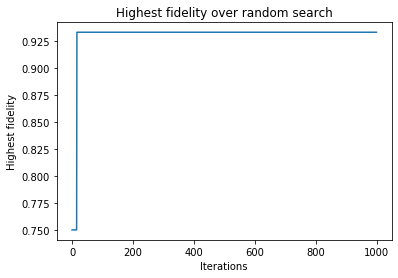

In [55]:
plt.plot(fidelarray)
plt.ylabel('Highest fidelity')
plt.xlabel('Iterations')
plt.title('Highest fidelity over random search')
plt.show()

In [57]:
pd.set_option('display.max_colwidth', 100)
reads = final.head(30)
reads

,state,gate,new,Q,fidelity
0,[[1.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]\n [0.+0.j]],8,[[0.70710678+0.j]\n [0. +0.j]\n [0.70710678+0.j]\n [0. +0.j]\n [0. +0.j]\n ...,-1.823493,0.0
1,[[0.70710678+0.j]\n [0. +0.j]\n [0.70710678+0.j]\n [0. +0.j]\n [0. +0.j]\n ...,9,[[0.5+0.j]\n [0.5+0.j]\n [0.5+0.j]\n [0.5+0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]],-1.628643,0.0
2,[[0.5+0.j]\n [0.5+0.j]\n [0.5+0.j]\n [0.5+0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]],14,[[0.5+0.j ]\n [0.5+0.j ]\n [0. +0.5j]\n [0. +0.5j]\n [0. +0.j ]\n [0. +0.j ]\n [0. +0.j ]\n [0. ...,-1.152818,0.0
3,[[0.5+0.j ]\n [0.5+0.j ]\n [0. +0.5j]\n [0. +0.5j]\n [0. +0.j ]\n [0. +0.j ]\n [0. +0.j ]\n [0. ...,7,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,-0.585352,0.0
4,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0.000000,0.0
5,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0.000000,0.0
6,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0.000000,0.0
7,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0.000000,0.0
8,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0.000000,0.0
9,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0,[[0.35355339+0.j ]\n [0.35355339+0.j ]\n [0. +0.35355339j]\n [0. +0....,0.000000,0.0


In [37]:
actionlist

[12,
 3,
 6,
 7,
 12,
 9,
 4,
 11,
 2,
 3,
 8,
 13,
 15,
 9,
 11,
 10,
 15,
 3,
 12,
 11,
 3,
 6,
 7,
 0,
 5,
 5,
 9,
 7,
 7,
 11,
 6,
 0,
 9,
 8,
 0,
 11,
 0,
 0,
 15,
 13,
 13,
 5,
 9,
 0,
 2,
 12,
 8,
 8,
 12,
 11,
 0,
 4,
 6,
 9,
 2,
 6,
 4,
 15,
 5,
 8,
 11,
 1,
 11,
 10,
 14,
 10,
 7,
 15,
 7,
 13,
 5,
 10,
 4,
 3,
 2,
 12,
 5,
 14,
 11,
 7,
 4,
 0,
 2,
 15,
 8,
 1,
 4,
 9,
 2,
 6,
 2,
 4,
 2,
 9,
 12,
 0,
 14,
 1,
 3,
 0,
 4,
 9,
 13,
 6,
 10,
 13,
 14,
 6,
 13,
 13,
 15,
 3,
 11,
 7,
 11,
 4,
 7,
 13,
 8,
 3,
 2,
 15,
 7,
 0,
 3,
 4,
 8,
 1,
 15,
 13,
 10,
 5,
 14,
 9,
 13,
 8,
 8,
 6,
 6,
 3,
 12,
 9,
 0,
 2,
 3,
 14,
 10,
 7,
 12,
 8,
 15,
 1,
 8,
 7,
 13,
 14,
 8,
 9,
 6,
 3,
 9,
 1,
 10,
 1,
 5,
 13,
 11,
 15,
 7,
 11,
 6,
 2,
 3,
 14,
 14,
 10,
 2,
 12,
 15,
 8,
 4,
 12,
 0,
 13,
 2,
 9,
 14,
 3,
 1,
 13,
 13,
 0,
 8,
 15,
 15,
 0,
 3,
 9,
 2,
 4,
 15,
 11,
 2,
 13,
 2,
 2,
 6,
 3,
 3,
 1,
 3,
 14,
 0,
 6,
 10,
 11,
 1,
 6,
 5,
 3,
 10,
 9,
 10,
 8,
 12,
 10,
 0,
 8,
 3,
 

In [16]:
glist

[array([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]]),
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]]),
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0

In [40]:
together = tots1.groupby(['state','gate','new', 'fidelity'])['Q'].mean().reset_index()

In [1]:
ask = zoo
table = together.copy()
final = pd.DataFrame() #Dataframe to store state action pairs for top Q values for each agent
tots1 = pd.DataFrame() 
oppa = table.loc[(table.state == str(ask))] #select the rows with the initial state
lol = oppa.sort_values("Q", ascending=False) #sort according to Q value
top = lol.head(1) #Choose the state action pair with the top Q value
for n in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
        
    oppa1 = table.loc[(table.state == top['new'].values[n])] #Find the state that results from the top action being applied
    lol = oppa1.sort_values("Q", ascending=False) #find the max Q value of next state
    top1 = lol.head(1)
        
    top = top.append(top1) #add it to the dataframe of steps
    if (top.iloc[(n+1)]['gate'] == top.iloc[(n)]['gate']):
        break
         
final = final.append(top) #add this agents top first 4 steps to the other agents top first 4 steps
final = final.reset_index(drop=True)

reads = final.head(30)

first = reads.iloc[0]['state']
last = reads.iloc[(len(reads) -1)]['new']
print('to get from ')
print(first)
print(' to ')
print(last)
print(' use actions: ')
for ii in range(0,len(reads)):
    act = reads.iloc[ii]['gate']
    act2 = glist[act]
    print(str(act) + str(act2))

NameError: name 'zoo' is not defined

In [31]:
H1.dot(S1.dot(S1.dot(H1.dot(psi1))))

array([[0.8660254+0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.5      +0.j],
       [0.       +0.j],
       [0.       +0.j],
       [0.       +0.j]])